In [35]:
""" If you need any help . Feel free to connect with me 
    
    https://www.linkedin.com/in/shivam-batra-34b63a17a/
"""

' If you need any help . Feel free to connect with me \n    \n    https://www.linkedin.com/in/shivam-batra-34b63a17a/\n'

## Loading data

In [1]:
import os
import cv2

In [2]:
def dataset_reader(path):
    """Function to iterate over each file in the dataset and read it using opencv
    We are reading file name as label which will be processed further.
    """
    images=[]
    labels=[]
    for DIR,SUB,files in os.walk(path):
        for file in files:
            print(path+file)
            try:
                image=cv2.imread(path+file)
                image=cv2.resize(image,(180,240))
                images.append(image)
                labels.append(str(file)[:-4])
            except:
                print("skipped")
                pass
    return [images,labels]

In [3]:
data,labels=dataset_reader("dataset/")

dataset/cloudy1.jpg
dataset/cloudy10.jpg
dataset/cloudy100.jpg
dataset/cloudy101.jpg
dataset/cloudy102.jpg
dataset/cloudy103.jpg
dataset/cloudy104.jpg
dataset/cloudy105.jpg
dataset/cloudy106.jpg
dataset/cloudy107.jpg
dataset/cloudy108.jpg
dataset/cloudy109.jpg
dataset/cloudy11.jpg
dataset/cloudy110.jpg
dataset/cloudy111.jpg
dataset/cloudy112.jpg
dataset/cloudy113.jpg
dataset/cloudy114.jpg
dataset/cloudy115.jpg
dataset/cloudy116.jpg
dataset/cloudy117.jpg
dataset/cloudy118.jpg
dataset/cloudy119.jpg
dataset/cloudy12.jpg
dataset/cloudy120.jpg
dataset/cloudy121.jpg
dataset/cloudy122.jpg
dataset/cloudy123.jpg
dataset/cloudy124.jpg
dataset/cloudy125.jpg
dataset/cloudy126.jpg
dataset/cloudy127.jpg
dataset/cloudy128.jpg
dataset/cloudy129.jpg
dataset/cloudy13.jpg
dataset/cloudy130.jpg
dataset/cloudy131.jpg
dataset/cloudy132.jpg
dataset/cloudy133.jpg
dataset/cloudy134.jpg
dataset/cloudy135.jpg
dataset/cloudy136.jpg
dataset/cloudy137.jpg
dataset/cloudy138.jpg
dataset/cloudy139.jpg
dataset/cloudy14

dataset/rain190.jpg
dataset/rain191.jpg
dataset/rain192.jpg
dataset/rain193.jpg
dataset/rain194.jpg
dataset/rain195.jpg
dataset/rain196.jpg
dataset/rain197.jpg
dataset/rain198.jpg
dataset/rain199.jpg
dataset/rain2.jpg
dataset/rain20.jpg
dataset/rain200.jpg
dataset/rain201.jpg
dataset/rain202.jpg
dataset/rain203.jpg
dataset/rain204.jpg
dataset/rain205.jpg
dataset/rain206.jpg
dataset/rain207.jpg
dataset/rain208.jpg
dataset/rain209.jpg
dataset/rain21.jpg
dataset/rain210.jpg
dataset/rain211.jpg
dataset/rain212.jpg
dataset/rain213.jpg
dataset/rain214.jpg
dataset/rain215.jpg
dataset/rain22.jpeg
dataset/rain23.jpg
dataset/rain24.jpeg
dataset/rain25.jpg
dataset/rain26.jpg
dataset/rain27.jpg
dataset/rain28.jpg
dataset/rain29.jpg
dataset/rain3.jpg
dataset/rain30.jpg
dataset/rain31.jpg
dataset/rain32.jpg
dataset/rain33.jpg
dataset/rain34.jpg
dataset/rain35.jpg
dataset/rain36.jpg
dataset/rain37.jpg
dataset/rain38.jpg
dataset/rain39.jpg
dataset/rain4.jpg
dataset/rain40.jpg
dataset/rain41.jpg
datase

dataset/sunrise142.jpg
dataset/sunrise143.jpg
dataset/sunrise144.jpg
dataset/sunrise145.jpg
dataset/sunrise146.jpg
dataset/sunrise147.jpg
dataset/sunrise148.jpg
dataset/sunrise149.jpg
dataset/sunrise15.jpg
dataset/sunrise150.jpg
dataset/sunrise151.jpg
dataset/sunrise152.jpg
dataset/sunrise153.jpg
dataset/sunrise154.jpg
dataset/sunrise155.jpg
dataset/sunrise156.jpg
dataset/sunrise157.jpg
dataset/sunrise158.jpg
dataset/sunrise159.jpg
dataset/sunrise16.jpg
dataset/sunrise160.jpg
dataset/sunrise161.jpg
dataset/sunrise162.jpg
dataset/sunrise163.jpg
dataset/sunrise164.jpg
dataset/sunrise165.jpg
dataset/sunrise166.jpg
dataset/sunrise167.jpg
dataset/sunrise168.jpg
dataset/sunrise169.jpg
dataset/sunrise17.jpg
dataset/sunrise170.jpg
dataset/sunrise171.jpg
dataset/sunrise172.jpg
dataset/sunrise173.jpg
dataset/sunrise174.jpg
dataset/sunrise175.jpg
dataset/sunrise176.jpg
dataset/sunrise177.jpg
dataset/sunrise178.jpg
dataset/sunrise179.jpg
dataset/sunrise18.jpg
dataset/sunrise180.jpg
dataset/sunrise

## Filtering Labels

In [4]:
def extract_alpha(label_name):
    """ Function to remove numbers from the file name and 
    
    return all the characters including characters
    """
    extracted_label=" "
    for char in label_name:
        if char.isalpha():
            extracted_label+=char
        else:
            pass
            
    return extracted_label.strip()

In [5]:
labels=list(map(extract_alpha,labels))

## Encoding the labels

In [6]:
## Label encoder to encode the string label to vector form

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [7]:
le=LabelEncoder()

In [8]:
Y=le.fit_transform(labels)

In [9]:
## To_categorical is used so that we can use softmax and intrepret its output as a probability distribution over classes

Y = np_utils.to_categorical(Y, 4)

In [10]:
le.classes_

array(['cloudy', 'rain', 'shine', 'sunrise'], dtype='<U7')

## Normalize the image input

In [11]:
def prepare_data(image):
    """ Normalize the image pixel from range of 0-255 to the range of 0-1 so that network can learn fast
    """
    return image/255.0

In [12]:
X=list(map(prepare_data,data))

## Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.25, random_state=42,stratify=Y)

In [15]:
X_train[0].shape

(240, 180, 3)

## Building neural Network

In [16]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential()

height=240
width=180
depth=3

inputShape = (height, width, depth)

chanDim = -1

model.add(Conv2D(16, (3, 3), padding="same",
    input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier head 
model.add(Dense(4))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 180, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 240, 180, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 240, 180, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 180, 16)      2320      
_________________________________________________________________
activation_1 (Activation)    (None, 240, 180, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 240, 180, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 90, 16)       0

In [18]:
INIT_LR = 1e-4

BS = 8
EPOCHS = 30
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [19]:
import numpy as np
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
print(X_train.shape,X_test.shape)

(842, 240, 180, 3) (281, 240, 180, 3)


In [20]:
H=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=EPOCHS)

Epoch 1/30
27/27 [==============================] - 4s 144ms/step - loss: 0.2958 - accuracy: 0.7898 - val_loss: 0.4813 - val_accuracy: 0.5053
Epoch 2/30
27/27 [==============================] - 3s 107ms/step - loss: 0.1809 - accuracy: 0.8694 - val_loss: 0.5924 - val_accuracy: 0.3203
Epoch 3/30
27/27 [==============================] - 3s 107ms/step - loss: 0.1472 - accuracy: 0.8931 - val_loss: 0.6914 - val_accuracy: 0.2705
Epoch 4/30
27/27 [==============================] - 3s 105ms/step - loss: 0.1096 - accuracy: 0.9133 - val_loss: 0.7775 - val_accuracy: 0.2776
Epoch 5/30
27/27 [==============================] - 3s 112ms/step - loss: 0.0839 - accuracy: 0.9477 - val_loss: 0.8709 - val_accuracy: 0.2705
Epoch 6/30
27/27 [==============================] - 3s 109ms/step - loss: 0.0792 - accuracy: 0.9371 - val_loss: 0.8868 - val_accuracy: 0.2776
Epoch 7/30
27/27 [==============================] - 3s 117ms/step - loss: 0.0771 - accuracy: 0.9430 - val_loss: 0.9435 - val_accuracy: 0.2740
Epoch 

## Evaluation

In [30]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

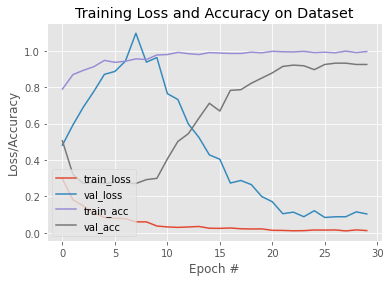

In [31]:
# pllot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.show()

In [34]:
predictions = model.predict(X_test, batch_size=BS)

report=classification_report(y_test.argmax(axis=1),
        predictions.argmax(axis=1), target_names=le.classes_)

print(report)

              precision    recall  f1-score   support

      cloudy       0.84      0.92      0.88        75
        rain       0.96      0.85      0.90        54
       shine       0.92      0.89      0.90        63
     sunrise       0.99      1.00      0.99        89

    accuracy                           0.93       281
   macro avg       0.93      0.92      0.92       281
weighted avg       0.93      0.93      0.93       281

